# Esercitazione 3

In questa esercitazione vogliamo verificare la soluzione analitica di Black e Scholes per il prezzamento delle opzioni europee di call e put attraverso metodi numerici Monte Carlo campionando in un unico step il prezzo dell'asset o attraverso step discreti. 


## Esercizio 3.1

Nel 1900 Louis Bachelier sviluppo' la matematica del moto browniano per modellizzare l'evoluzione nel tempo dei prezzi di un asset. Nel 1944, Ito introdusse una variante del moto browniano: il moto browniano geometrico. Un prezzo che segue il GBM non puo' mai essere negativo perche' il GBM e' l'esponenziazione di un BM standard: il GBM e', percio', un ottimo modello da usare per stimare il prezzo di un asset. \
Nel 1973, infatti, Block e Scholes ipotizzarono che l'evoluzione nel tempo del prezzo di un asset fosse stocastica e seguisse un moto browniano geometrico con rate di interessi costante r e una volatilita $\sigma$. Questa modelizzazione valse a Scholes il Premio Nobel per l'economia del 1997. 

La ragione principale per cui matematici e fisici sono coinvolti nella finanza e', pero', la gestione del rischio di investimento e in finanza i principali prodotti con cui ci si puo' proteggere da importanti perdite sono i contratti. Noi siamo interessati, percio', non tanto a simulare l'andamento di mercato di un bene quanto a stimare attraverso metodi numerici il prezzo di Opzioni europee di Call e Put. \
Le opzioni sono contratti in cui solo uno dei due soggetti coinvolti si assume l'obbligo, mentre l'altro soggetto ottiene il diritto. Nell'opzione europea abbiamo che il venditore dell'opzione garantisce al compratore il diritto di comprare (Call Option) dal venditore o di vendere (Put Option) al venditore un asset con spot price $S(t)$ per un prezzo prescritto $K$ chiamato strike price alla data di scadenza del contratto $T$. \
La feature chiave di una opzione e' che solo il venditore ha l'obbligo: dovra', quindi, al tempo T vendere o comprare necessariamente l'asset. \
Il compratore, invece, sfruttera' il suo diritto di comprare o vendere solo se avra' un guadagno. /
Questo puo' succedere in due casi distinti:
- se alla delivery date il prezzo di mercato dell'asset $S(T)$ sara' maggiore di $K$, il compratore che ha acquistato una call option potra' acquistare l'asset a $K$ generando un profitto pari a $S(T)-K$;
- al contrario, se $S(T)<K$, il compratore che ha acquistato una Put Option potra' vendere l'asset con profitto $K-S(T)$.


Nella teoria di Black e Scholes, il prezzo di un asset S segue un moto browniano geometrico con valor medio il tasso di interesse $r$ e varianza la volatilita' al quadrato. Se quindi S(0) e' il prezzo al tempo iniziale, il prezzo alla scadenza del contratto sara':

$$S(T)= S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$ 

dove $W(t)\sim\mathcal{N}(0,t)$ cioe' segue un andamento normale con valor medio zero e varianza t. \
Inoltre, visto che gli incrementi di $W$ sono indipendenti e distribuiti normalmente , si puo' estratte un semplice metodo ricorsivo per campionare i valori di $S\sim GBM(r,\sigma^2)$ a $t_1 < t_2 < … < t_n$:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i) +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$ 

dove $Z_i \sim \mathcal{N}(0,1)$. 

Attraverso questa, possiamo andare a stimare il prezzo di una Call e di una Put option al tempo iniziale:

$$C[S(0),0] =e^{-rt} max[0, S(T)-K] $$ 

$$ P[S(0),0] =e^{-rt} max[S(T)-K, 0] $$

dove il fattore esponenziale tiene conto dello sconto da effettuare al tempo t a causa degli interessi che una banca garantirebbe se quel denaro fosse depositato presso loro al tempo t=0 piuttosto che investito e la funzione max interpreta la liberta' del compratore di esercitare, o meno, il suo diritto di acquisto o di vendita.


Il nostro obiettivo e' stimare il prezzo di una Call e di una Put option al tempo iniziale utilizzando come parametri delle nostre opzioni:
- prezzo dell'asset a $t=0$: $S(0)=100$;
- delivery time: $T=1$;
- strike price: $K=100$;
- tasso di interessi risk-free: $r=0.1$;
- volatilita': $\sigma=0.25$.

Sfrutteremo, come al solito, il metodo del data blocking effettuando n grande numero di campionamenti, $10^4$, suddiviso in 100 blocchi, cosi' da poter studiare l'andamento della stima del prezzo delle opzioni e del loro errore in funzione del blocco. 

In realta', non solo sfruttiamo il Monte Carlo per stimare il prezzo delle opzioni al tempo inziale, ma campioniamo l'andamento del prezzo dell'asset in due modi dversi:
1. campioniamo **direttamente** il prezzo finale dell'asset $S(T)$</span> che segue l'andamento di $GBM(r,\sigma^2)$;
2. campioniamo **il cammino discreto** di un moto browniano geometrico dividendo l'intervallo $[0, T]$ in 100 sottointervalli.

Infine, confronteremo i risultati da noi ottenuti nei due casi con la soluzione analitica di Black e Scholes che riportiamo di seguito.

In [19]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## Sampling Diretto

Campioniamo l'andamento del prezzo dell'asset in un unico step: valutiamo direttamente $S(T)$ attraverso la formula per $S(t_{i+1})$ riportata sopra con tempo inziale $t_i = 0$, tempo finale $t_{i+1} = T$ e $S$ al tempo precedente pari ad S(t=0).

Plottiamo, poi, la nostra stima di $C[S(0),0]$ e di $P[S(0),0]$ effettuata mediante questo campionamento diretto come funzione del numero di blocchi.

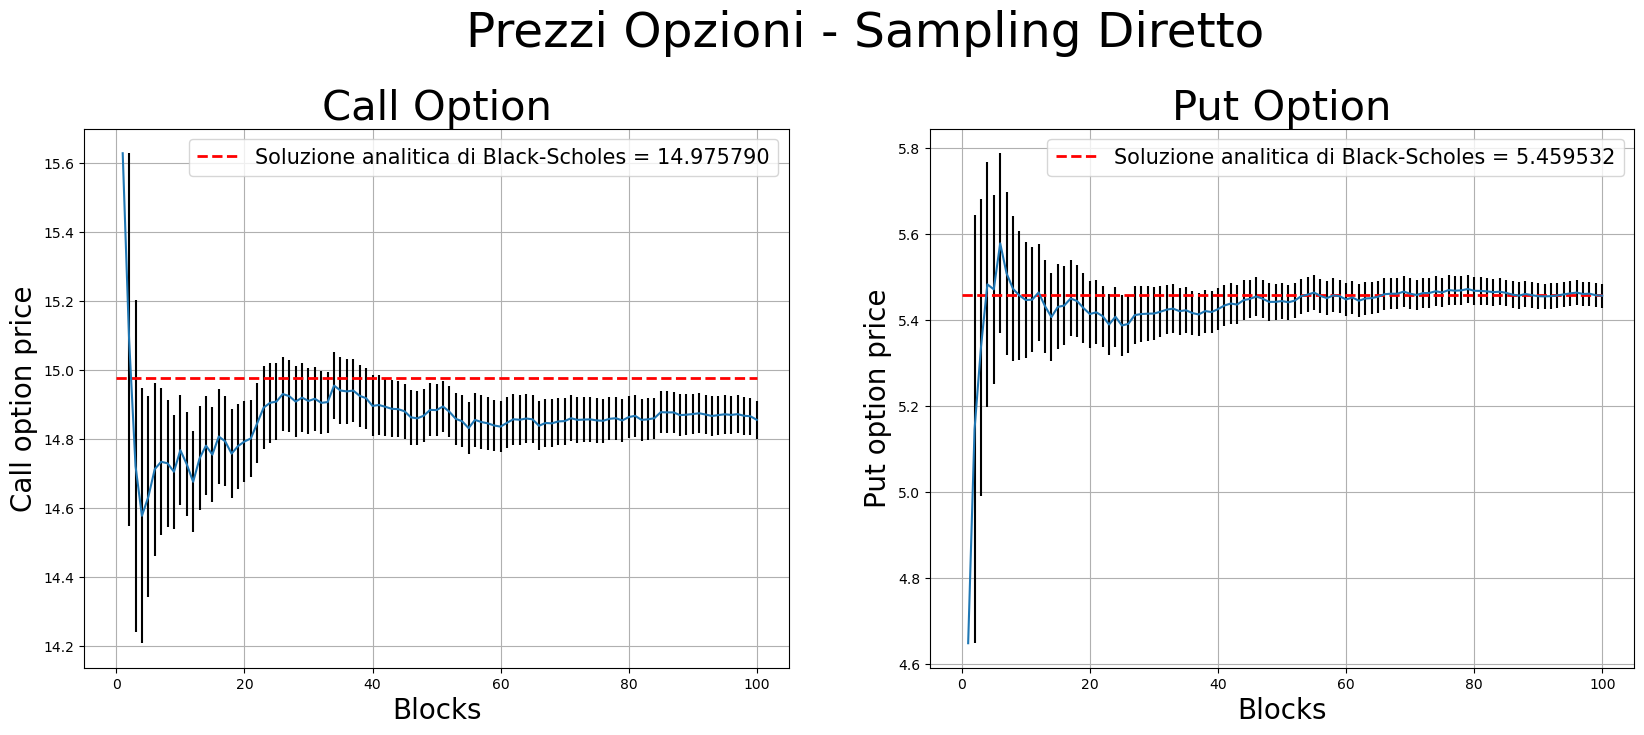

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =100
x = np.arange(N)+1  
plt.figure(figsize=(20,7))

directly_call_average, directly_call_error = np.loadtxt("Econofisica/directly_call_results.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.subplot(1, 2, 1)
plt.errorbar(x,directly_call_average,yerr=directly_call_error, ecolor='black')
plt.title('Call Option', fontsize=30)
plt.grid(True)
plt.hlines(14.975790778311286, 0, 100, colors='r', linestyles='dashed', linewidth =2, label = "Soluzione analitica di Black-Scholes = 14.975790")
plt.xlabel('Blocks', fontsize=20)
plt.ylabel('Call option price', fontsize=20) #price è corretto?
plt.legend(fontsize="15")

directly_put_average, directly_put_error = np.loadtxt("Econofisica/directly_put_results.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.subplot(1, 2, 2)
plt.errorbar(x,directly_put_average,yerr=directly_put_error, ecolor='black')
plt.title('Put Option', fontsize=30)
plt.grid(True)
plt.hlines(5.4595325819072364, 0, 100, colors='r', linestyles='dashed', linewidth =2, label = "Soluzione analitica di Black-Scholes = 5.459532")
plt.xlabel('Blocks', fontsize=20)
plt.ylabel('Put option price', fontsize=20)
plt.legend(fontsize="15")

plt.suptitle ("    Prezzi Opzioni - Sampling Diretto", fontsize =35, y=1.05)
plt.show()

Riportiamo, quindi, le nostre migliori stime col relativo errore per il prezzo di una Call e di una Put Option nel caso di sampling diretto:

In [21]:
print ('Call Option: ' + str(directly_call_average[99]) + ' +- ' + str(directly_call_error[99]) + '\nPut Option:  ' 
       + str(directly_put_average[99]) + ' +- ' + str(directly_put_error[99]) )

Call Option: 14.8548 +- 0.0545867
Put Option:  5.45748 +- 0.0278519


Possiamo notare come mentre il valore della Call Option trovato disti circa $2\sigma$ dalla soluzione analitica di Black e Scholes, il valore della Put Option e' praticamente corretto!

## Sampling Discreto

In questo caso, invece, campioniamo ricorsivamente e in modo discreto il prezzo dell'asset sempre seguendo un moto browniano geometrico. Suddividiamo, quindi, l'intervallo $[0, T]$ in $100$ sottointervalli e calcoliamo per ogni intervallo $S(t)$ sfruttando la stima di S calcolata nell'intervallo precedente. Infine, per stimare i prezzi della Call e della Put option, utilizziamo $S$ calcolata allo striking time $T$ cioe' $S(t_{100})$. \
Ovviamente il valore di $S(T)$ calcolato sara' differente da quello trovato nel caso di campionamento diretto proprio perche' per arrivare a $S(T)$ abbiamo utilizzato $S(t_1), S(t_2), ..., S(t_{99})$. 

Riportiamo i plot per il prezzo delle due opzioni al tempo iniziale in funzione dei blocchi.

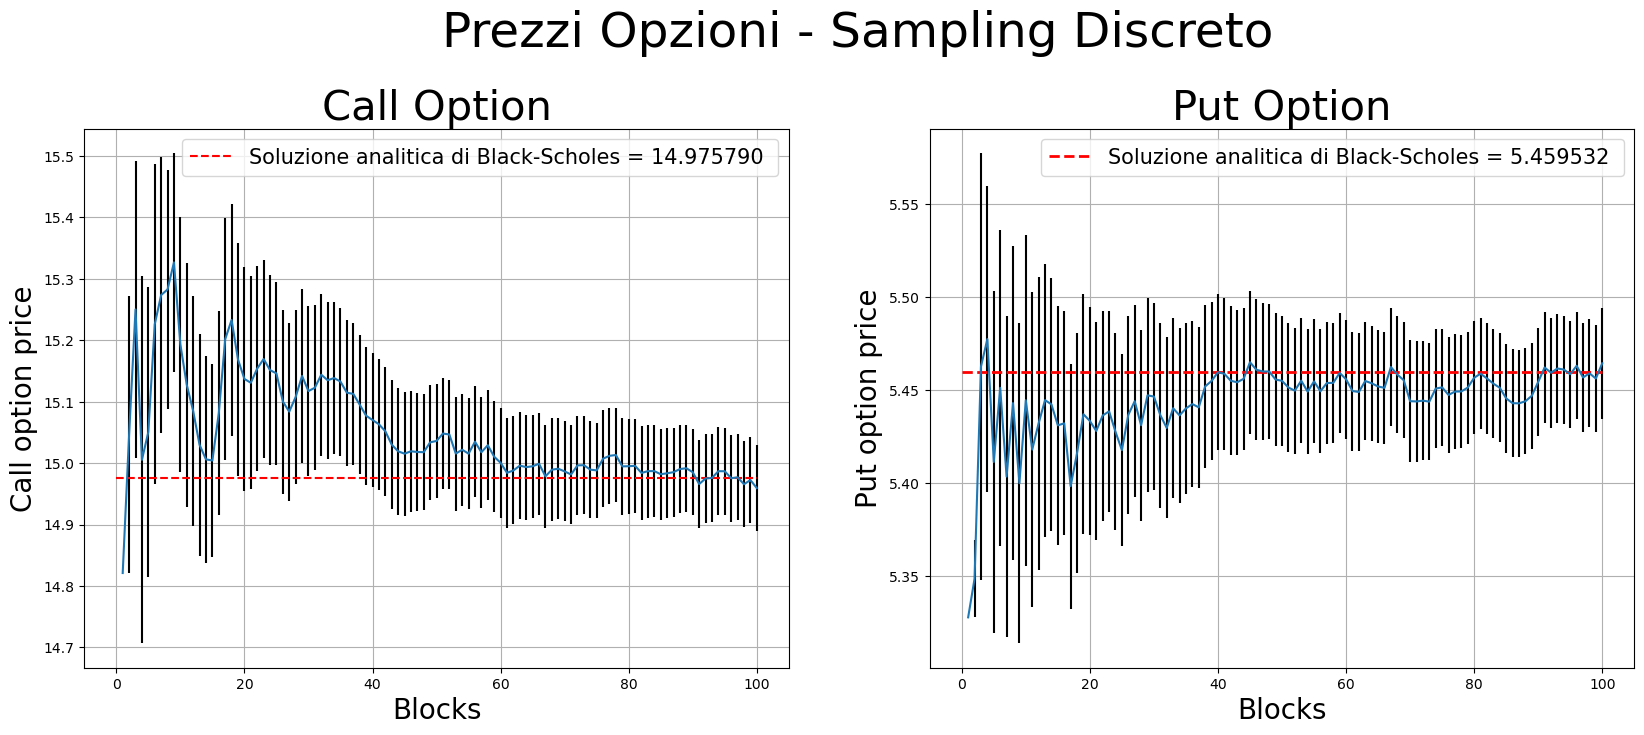

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =100
x = np.arange(N)+1  
plt.figure(figsize=(20,7))

discrete_call_average, discrete_call_error = np.loadtxt("Econofisica/discrete_call_results.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.subplot(1, 2, 1)
plt.errorbar(x,discrete_call_average,yerr=discrete_call_error, ecolor='black')
plt.title('Call Option', fontsize=30)
plt.grid(True)
plt.hlines(14.975790778311286, 0, 100, colors='r', linestyles='dashed', label = "Soluzione analitica di Black-Scholes = 14.975790 ")
plt.xlabel('Blocks', fontsize=20)
plt.ylabel('Call option price', fontsize=20)
plt.legend(fontsize="15")

discrete_put_average, discrete_put_error = np.loadtxt("Econofisica/discrete_put_results.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.subplot(1, 2, 2)
plt.errorbar(x,discrete_put_average,yerr=discrete_put_error, ecolor='black')
plt.title('Put Option', fontsize=30)
plt.grid(True)
plt.hlines(5.4595325819072364, 0, 100, colors='r', linestyles='dashed', linewidth =2, label = "Soluzione analitica di Black-Scholes = 5.459532 ")
plt.xlabel('Blocks', fontsize=20)
plt.ylabel('Put option price', fontsize=20)
plt.legend(fontsize="15")

plt.suptitle ("    Prezzi Opzioni - Sampling Discreto ", fontsize = 35, y=1.05)
plt.show()

Riportiamo, quindi, le nostre migliori stime col relativo errore per il prezzo di una Call e di una Put Option nel caso di sampling discreto:

In [23]:
print ('Call Option: ' + str(discrete_call_average[99]) + ' +- ' + str(discrete_call_error[99]) + '\nPut Option:  ' 
       + str(discrete_put_average[99]) + ' +- ' + str(discrete_put_error[99]) )

Call Option: 14.9595 +- 0.0703775
Put Option:  5.46446 +- 0.0297066


Possiamo notare come entrambi i valori siano distanti dalla soluzione di Balck e Scholes di circa un quinto di $\sigma$. Osservaimo, quindi, come il metodo di campionamento discreto migliori di molto i risultati ottenuti per il calcolo del valore delle Opzioni al tempo iniziale. \
Ci riteniamo, percio', soddisfatti per aver verificato numericamente la soluzione analitica di Black e Scholes.